In [11]:
import xarray as xr
import matplotlib.pyplot as plt

# ---------- 1. Open the NetCDF file ----------
# Replace with your actual file name/path
nc_path = "test.nc"
ds = xr.open_dataset(nc_path)

# ---------- 2. Get an overview (like df.info()) ----------
print("\n=== DATASET SUMMARY ===")
print(ds)          # dims, coords, variables, attributes
print("\n=== DETAILED INFO ===")
ds.info()          # types, sizes, etc.

print("\n=== DATA VARIABLES ===")
print(ds.data_vars)

print("\n=== COORDINATES ===")
print(ds.coords)




=== DATASET SUMMARY ===
<xarray.Dataset> Size: 405MB
Dimensions:               (time_counter: 120, axis_nbounds: 2, lat: 24,
                           lon: 144, klevp1: 80, bnds: 2, klev: 79, presnivs: 79)
Coordinates:
  * time_counter          (time_counter) datetime64[ns] 960B 2015-01-16T12:00...
  * lat                   (lat) float32 96B -60.85 -62.11 ... -88.73 -90.0
  * lon                   (lon) float32 576B -180.0 -177.5 ... 175.0 177.5
  * klevp1                (klevp1) float64 640B 1.0 2.0 3.0 ... 78.0 79.0 80.0
  * bnds                  (bnds) float32 8B 1.0 2.0
  * klev                  (klev) float64 632B 1.0 2.0 3.0 4.0 ... 77.0 78.0 79.0
  * presnivs              (presnivs) float32 316B 1.012e+05 1.009e+05 ... 1.483
    time_instant          (time_counter) datetime64[ns] 960B ...
    time_centered         (time_counter) datetime64[ns] 960B ...
Dimensions without coordinates: axis_nbounds
Data variables: (12/273)
    time_instant_bounds   (time_counter, axis_nbounds) d

In [7]:
# ---------- 3. Pick one variable and inspect it ('head' equivalent) ----------
# Replace 'temperature' by the variable name you want
var_name = list(ds.data_vars)[20]  # automatically pick first variable
da = ds[var_name]

print(f"\n=== DATAARRAY SUMMARY: {var_name} ===")
print(da)

# Show first 5 entries along the first dimension (like head)
main_dim = list(da.dims)[0]  # e.g. 'time', 'x', 'y', etc.
da_head = da.isel({main_dim: slice(0, 5)})

print(f"\n=== FIRST 5 ENTRIES ALONG DIM '{main_dim}' FOR '{var_name}' ===")
print(da_head)

# If you want to see the raw numeric values
print("\n=== NUMERIC VALUES (FIRST 5 ENTRIES) ===")
print(da_head.values)



=== DATAARRAY SUMMARY: rsun4 ===
<xarray.DataArray 'rsun4' (time_counter: 120)> Size: 480B
[120 values with dtype=float32]
Coordinates:
  * time_counter   (time_counter) datetime64[ns] 960B 2015-01-16T12:00:00 ......
    time_instant   (time_counter) datetime64[ns] 960B ...
    time_centered  (time_counter) datetime64[ns] 960B ...
Attributes:
    long_name:           Fraction constante solaire bande 4
    units:               W/m2
    online_operation:    instant
    interval_operation:  900 s
    interval_write:      1 month
    cell_methods:        time: point (interval: 900 s)

=== FIRST 5 ENTRIES ALONG DIM 'time_counter' FOR 'rsun4' ===
<xarray.DataArray 'rsun4' (time_counter: 5)> Size: 20B
[5 values with dtype=float32]
Coordinates:
  * time_counter   (time_counter) datetime64[ns] 40B 2015-01-16T12:00:00 ... ...
    time_instant   (time_counter) datetime64[ns] 40B ...
    time_centered  (time_counter) datetime64[ns] 40B ...
Attributes:
    long_name:           Fraction constante s

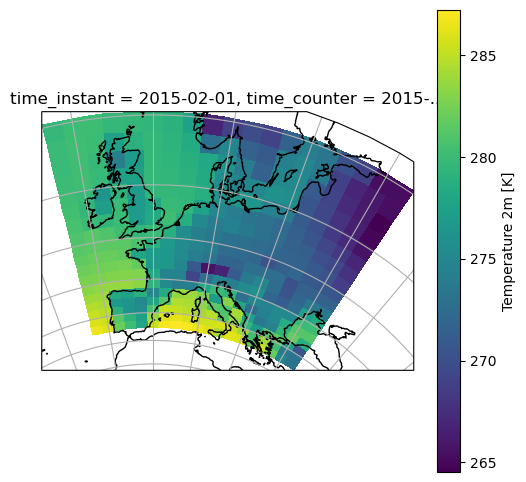

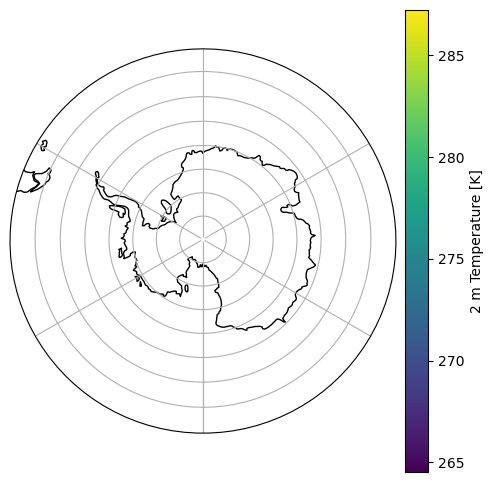

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Mon Nov 24 09:35:44 2025

@author: corden
"""

# code snippet for opening and plotting IPSL netcdf

import os, sys, glob
import numpy as np
import xarray as xr # use xarray to open the files
import datetime as dt

import matplotlib.pyplot as plt # use matplotlib for plotting
import cartopy.crs as ccrs # use cartopy for maps
import matplotlib.path as mpath

ds = xr.open_dataset('europe_test.nc')

# print the variable short names
#print(list(ds.keys()))

# print the full variable information
# print(ds.variables)

#%% #########################  plot surface temperature

t_surf = ds.t2m #t_surf is now a dataarray and not a dataset
first_timestep = t_surf.isel(time_counter = 0)

# how to plot in polar projection
fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection=ccrs.SouthPolarStereo())
first_timestep.plot(ax = ax, transform = ccrs.PlateCarree())
ax.gridlines()
ax.coastlines()

#%% #########################

# how to plot same smooth map with pcolormesh (more customisable)
fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection=ccrs.SouthPolarStereo()) # plot as a circle over the north pole
ax.set_extent([-180, 180, -50, -50], ccrs.PlateCarree())
c = ax.pcolormesh(first_timestep.lon, first_timestep.lat, first_timestep, transform = ccrs.PlateCarree())
plt.colorbar(c, label=r'2 m Temperature [K]',pad=0.02,ax=ax)

ax.gridlines()
ax.coastlines()

# add a circular boundary to the map
theta = np.linspace(0, 2*np.pi, 100)
map_circle = mpath.Path(np.vstack([np.sin(theta), np.cos(theta)]).T * 0.5 + [0.5, 0.5])
ax.set_boundary(map_circle, transform=ax.transAxes)




Q: was the previous code right? it uses both SouthPolarStereo and PlateCarree??

A: You are right to point that out, it's a key concept in Cartopy. The code is correct, and here is why it uses both:

1.  `projection=ccrs.SouthPolarStereo()`: This argument tells Matplotlib/Cartopy what projection to use for the **map axes**. It defines how the final map will be displayed on your screen (in this case, a view over the South Pole).

2.  `transform=ccrs.PlateCarree()`: This argument tells the plotting function (`.plot()` or `pcolormesh`) what projection your **input data** is in. Your data's coordinates are longitude and latitude, which corresponds to the `PlateCarree` projection.

So, the code is telling Cartopy: "Create a map with a `SouthPolarStereo` view, and then take my data, which is in `PlateCarree` coordinates, and correctly project it onto that map." Cartopy handles the transformation from your data's coordinate system to the map's coordinate system automatically.

In [ ]:
def describe_da(da, name="variable"):
    print(f"\n=== SUMMARY FOR {name} ===")
    print(f"type:        {type(da)}")
    print(f"dims:        {da.dims}")
    print(f"shape:       {da.shape}")     # e.g. (time, lat, lon)
    print(f"ndim:        {da.ndim}")      # 1D / 2D / 3D / ...
    print(f"size:        {da.size} values")
    print(f"dtype:       {da.dtype}")
    print(f"coords:      {list(da.coords)}")
    print(f"attrs:       {da.attrs}")

    print("\n--- xarray summary ---")
    print(da)  # same as print(t_surf)

# call it
describe_da(t_surf, name="t_surf")


=== SUMMARY FOR t_surf ===
type:        <class 'xarray.core.dataarray.DataArray'>
dims:        ('time_counter', 'lat', 'lon')
shape:       (120, 18, 19)
ndim:        3
size:        41040 values
dtype:       float32
coords:      ['lat', 'lon', 'time_instant', 'time_counter', 'time_centered']
attrs:       {'long_name': 'Temperature 2m', 'units': 'K', 'online_operation': 'average', 'interval_operation': '900 s', 'interval_write': '1 month', 'cell_methods': 'time: mean (interval: 900 s)'}

--- xarray summary ---
<xarray.DataArray 't2m' (time_counter: 120, lat: 18, lon: 19)> Size: 164kB
[41040 values with dtype=float32]
Coordinates:
  * time_counter   (time_counter) datetime64[ns] 960B 2015-01-16T12:00:00 ......
  * lat            (lat) float32 72B 59.58 58.31 57.04 ... 40.56 39.3 38.03
  * lon            (lon) float32 76B -12.5 -10.0 -7.5 -5.0 ... 27.5 30.0 32.5
    time_instant   (time_counter) datetime64[ns] 960B ...
    time_centered  (time_counter) datetime64[ns] 960B ...
Attributes:


In [ ]:
print(ds.coords)


Coordinates:
  * time_counter   (time_counter) datetime64[ns] 960B 2015-01-16T12:00:00 ......
  * lat            (lat) float32 72B 59.58 58.31 57.04 ... 40.56 39.3 38.03
  * lon            (lon) float32 76B -12.5 -10.0 -7.5 -5.0 ... 27.5 30.0 32.5
  * klevp1         (klevp1) float64 640B 1.0 2.0 3.0 4.0 ... 77.0 78.0 79.0 80.0
  * bnds           (bnds) float32 8B 1.0 2.0
  * klev           (klev) float64 632B 1.0 2.0 3.0 4.0 ... 76.0 77.0 78.0 79.0
  * presnivs       (presnivs) float32 316B 1.012e+05 1.009e+05 ... 5.297 1.483
    time_instant   (time_counter) datetime64[ns] 960B ...
    time_centered  (time_counter) datetime64[ns] 960B ...


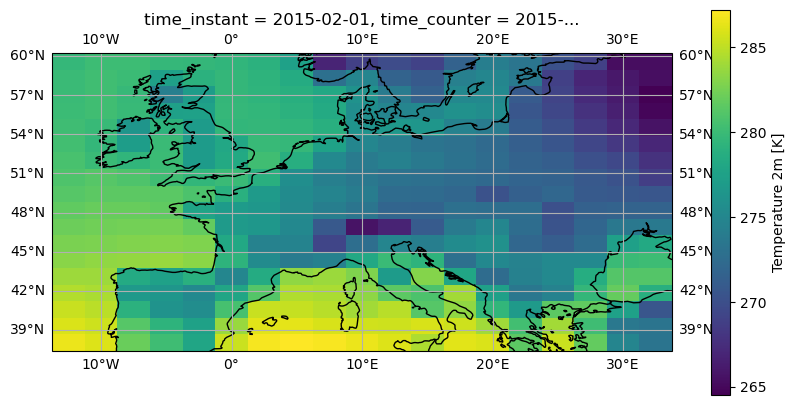

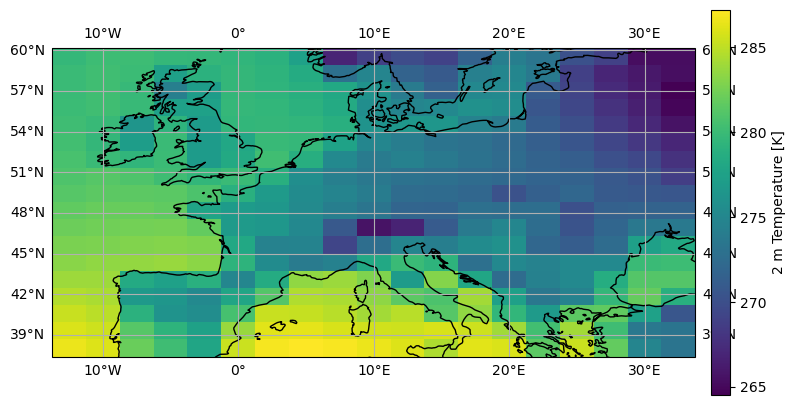

In [ ]:
# how to plot in PlateCarree projection
fig = plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.PlateCarree())
first_timestep.plot(ax = ax, transform = ccrs.PlateCarree())
ax.gridlines(draw_labels=True)
ax.coastlines()

#%% #########################

# how to plot same smooth map with pcolormesh (more customisable)
fig = plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_extent([-180, 180, -90, 90], ccrs.PlateCarree()) # Optionally set map extent
c = ax.pcolormesh(first_timestep.lon, first_timestep.lat, first_timestep, transform = ccrs.PlateCarree())
plt.colorbar(c, label=r'2 m Temperature [K]',pad=0.02,ax=ax)

ax.gridlines(draw_labels=True)
ax.coastlines()

In [9]:
# 2) Print the global dimensions in the dataset
print("\n=== DATASET DIMENSIONS ===")
for dim_name, dim_size in ds.dims.items():
    print(f"{dim_name}: {dim_size}")

# 3) Print coordinates (axes like time, lat, lon, levels)
print("\n=== COORDINATE VARIABLES ===")
for name, coord in ds.coords.items():
    print(f"{name}: dims={coord.dims}, shape={coord.shape}")

# 4) Print all data variables with their dimensions and size
print("\n=== DATA VARIABLES ===")
for name, var in ds.data_vars.items():
    print(f"{name}:")
    print(f"  dims  = {var.dims}")
    print(f"  shape = {var.shape}")
    print(f"  dtype = {var.dtype}")

    long_name = var.attrs.get("long_name", "(no long_name)")
    units = var.attrs.get("units", "(no units)")
    print(f"  long_name = {long_name}")
    print(f"  units = {units}")
    print()


=== DATASET DIMENSIONS ===
time_counter: 120
axis_nbounds: 2
lat: 24
lon: 144
klevp1: 80
bnds: 2
klev: 79
presnivs: 79

=== COORDINATE VARIABLES ===
lat: dims=('lat',), shape=(24,)
lon: dims=('lon',), shape=(144,)
klevp1: dims=('klevp1',), shape=(80,)
bnds: dims=('bnds',), shape=(2,)
klev: dims=('klev',), shape=(79,)
presnivs: dims=('presnivs',), shape=(79,)
time_instant: dims=('time_counter',), shape=(120,)
time_counter: dims=('time_counter',), shape=(120,)
time_centered: dims=('time_counter',), shape=(120,)

=== DATA VARIABLES ===
time_instant_bounds:
  dims  = ('time_counter', 'axis_nbounds')
  shape = (120, 2)
  dtype = datetime64[ns]
  long_name = (no long_name)
  units = (no units)

time_counter_bounds:
  dims  = ('time_counter', 'axis_nbounds')
  shape = (120, 2)
  dtype = datetime64[ns]
  long_name = (no long_name)
  units = (no units)

time_centered_bounds:
  dims  = ('time_counter', 'axis_nbounds')
  shape = (120, 2)
  dtype = datetime64[ns]
  long_name = (no long_name)
  un

C:\Users\simon\AppData\Local\Temp\ipykernel_24968\3494583062.py:3: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  for dim_name, dim_size in ds.dims.items():




## 1. Think of a Dataset as a dict of “fancy columns”

With pandas you have:

* a **DataFrame** → collection of columns
* each **column** → a 1D array with a **name** and **dtype**

With xarray you have:

* a **Dataset** (`ds`) → collection of **DataArrays**
* each **DataArray** → an *N-dimensional* array (can be 1D, 2D, 3D, …)
  with:

  * a **name**
  * **dims** (names of axes: `("time_counter", "lat", "lon")`)
  * **coords** (values along those axes)
  * **attrs** (metadata like `long_name`, `units`, etc.)

So:

* In pandas: `df["temperature"]` → 1D column
* In xarray: `ds["t2m"]` → N-D variable (here 3D: time, lat, lon)

---

## 2. Where is the **variable name**?

In xarray, the variable name is basically the **key in the Dataset**.

```python
import xarray as xr
ds = xr.open_dataset("europe_test.nc")

print(ds.data_vars.keys())
```

You’ll see something like:

```text
KeysView({'t2m', 'slp', 'wind10m', ...})
```

* `'t2m'` is the **name of the variable** inside the dataset.
* When you do `var = ds["t2m"]`, `var` is a **DataArray**.
* That DataArray also has a `.name`:

```python
var = ds["t2m"]
print(var.name)   # -> 't2m'
```

So:
👉 **“name” = variable name = the key you use to access it in `ds[...]`**

---

## 3. Where is the **long_name**?

Now the `long_name` is **not** the same thing as the variable’s name.

* In NetCDF, each variable can have **attributes** (metadata).

  * e.g. `long_name = "Temperature 2m"`, `units = "K"`, etc.
* Xarray puts those attributes into the DataArray’s `.attrs` dictionary.

Example:

```python
var = ds["t2m"]

print(var.attrs)
# might show: {'long_name': 'Temperature 2m', 'units': 'K', ...}

print(var.attrs["long_name"])      # -> 'Temperature 2m'
print(var.attrs.get("units"))      # -> 'K'
```

So:
👉 **`long_name` lives in `var.attrs`, not as the variable’s main “name”**.

Variable name vs long name:

* `var.name` → `'t2m'` (short, technical variable ID)
* `var.attrs["long_name"]` → `'Temperature 2m'` (human-readable description)

This is exactly like:

* column name in a DataFrame: `"temp"`
* plus some metadata elsewhere: `"Air temperature at 2m, daily mean"`.

---

## 4. Full mini-example tying it all together

```python
import xarray as xr

ds = xr.open_dataset("europe_test.nc")

# Loop over all data variables
for var_name, var in ds.data_vars.items():
    long_name = var.attrs.get("long_name", "(no long_name)")
    units = var.attrs.get("units", "(no units)")

    print(f"Variable name in ds: {var_name}")
    print(f"  var.name   = {var.name}")
    print(f"  long_name  = {long_name}")
    print(f"  units      = {units}")
    print(f"  dims       = {var.dims}")
    print(f"  shape      = {var.shape}")
    print()
```

For `t2m` you’d see something like:

```text
Variable name in ds: t2m
  var.name   = t2m
  long_name  = Temperature 2m
  units      = K
  dims       = ('time_counter', 'lat', 'lon')
  shape      = (120, 18, 19)
```

So:

* **“where is the name?”** → it’s the key in `ds[...]` and also `var.name`.
* **“where is the long_name?”** → inside the variable’s attributes: `var.attrs["long_name"]`.

If you want, next we can do a 1-to-1 mapping:
“this xarray thing ↔ this DataFrame thing” for dims, coords, and variables too.


In [10]:
ds

<xarray.Dataset> Size: 405MB
Dimensions:               (time_counter: 120, axis_nbounds: 2, lat: 24,
                           lon: 144, klevp1: 80, bnds: 2, klev: 79, presnivs: 79)
Coordinates:
  * time_counter          (time_counter) datetime64[ns] 960B 2015-01-16T12:00...
  * lat                   (lat) float32 96B -60.85 -62.11 ... -88.73 -90.0
  * lon                   (lon) float32 576B -180.0 -177.5 ... 175.0 177.5
  * klevp1                (klevp1) float64 640B 1.0 2.0 3.0 ... 78.0 79.0 80.0
  * bnds                  (bnds) float32 8B 1.0 2.0
  * klev                  (klev) float64 632B 1.0 2.0 3.0 4.0 ... 77.0 78.0 79.0
  * presnivs              (presnivs) float32 316B 1.012e+05 1.009e+05 ... 1.483
    time_instant          (time_counter) datetime64[ns] 960B ...
    time_centered         (time_counter) datetime64[ns] 960B ...
Dimensions without coordinates: axis_nbounds
Data variables: (12/273)
    time_instant_bounds   (time_counter, axis_nbounds) datetime64[ns] 2kB ...
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] 2kB ...
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] 2kB ...
    io_lon                (lat, lon) float32 14kB ...
    io_lat                (lat, lon) float32 14kB ...
    Ahyb                  (klevp1) float32 320B ...
    ...                    ...
    dqwak2d               (time_counter, lat, lon) float32 2MB ...
    dqlsc2d               (time_counter, lat, lon) float32 2MB ...
    dqvdf2d               (time_counter, lat, lon) float32 2MB ...
    dqeva2d               (time_counter, lat, lon) float32 2MB ...
    dqthe2d               (time_counter, lat, lon) float32 2MB ...
    dqajs2d               (time_counter, lat, lon) float32 2MB ...
Attributes:
    name:                      histmth
    description:               Created by xios
    title:                     Created by xios
    Conventions:               CF-1.6
    timeStamp:                 2018-Dec-05 17:19:23 GMT
    uuid:                      39612f3d-76a3-447a-996c-4e5354ca6963
    LongName:                  IPSLCM6.1.8-LR
    history:                   Thu Dec  6 12:34:51 2018: ncrcat -C --buffer_s...
    NCO:                       "4.6.0"
    nco_openmp_thread_number:  1

In this kind of climate/model NetCDF file, the variable names are often:

* **`..._ter`**
* **`..._lic`**
* **`..._sic`**
* (sometimes also `_oce`, `_sno`, etc.)

These usually correspond to **different surface types (“tiles”) inside each grid cell**.
In your case, they almost certainly mean:

* **`ter` → “terrestrial” = land (no permanent ice)**
* **`lic` → “land ice” = glaciers / ice sheets on land**
* **`sic` → “sea ice” = ice-covered ocean**

So for your variables:

```text
tsol_sic(time_counter, lat, lon)
  long_name = Temperature sic
  units     = K
```

➡️ **Surface temperature over the sea-ice part** of each grid cell.

```text
evappot_ter(time_counter, lat, lon)
  long_name = Temperature ter  (this long_name is probably wrong / copy-paste)
  units     = K (also a bit suspicious for evap…)
```

➡️ **Potential evaporation over the land (“terrestrial”) part** of each grid cell.

```text
evappot_lic(time_counter, lat, lon)
  long_name = Temperature lic  (again, looks like a bad long_name)
```

➡️ **Potential evaporation over land-ice surfaces** (glaciers/ice sheets).

So: same physical idea (surface temp, evap, etc.), but **split by surface category**:

* over land → `_ter`
* over land ice → `_lic`
* over sea ice → `_sic`

If you want to double-check this idea in your file, look for variables like:

```python
[v for v in ds.data_vars if v.endswith(("_ter", "_lic", "_sic"))]
```

Often you’ll also see **fraction variables** like `frac_ter`, `frac_lic`, `frac_sic` or similar that give the percentage of each surface type per grid cell.


In [14]:
nc_path_cla = "test_cla_2.nc"
ds_cla = xr.open_dataset(nc_path_cla)

In [15]:
ds_cla

<xarray.Dataset> Size: 331kB
Dimensions:        (time_counter: 120, lat: 18, lon: 19)
Coordinates:
  * time_counter   (time_counter) datetime64[ns] 960B 2045-01-16T12:00:00 ......
  * lat            (lat) float32 72B 59.58 58.31 57.04 ... 40.56 39.3 38.03
  * lon            (lon) float32 76B -12.5 -10.0 -7.5 -5.0 ... 27.5 30.0 32.5
    time_instant   (time_counter) datetime64[ns] 960B ...
    time_centered  (time_counter) datetime64[ns] 960B ...
Data variables:
    t2m            (time_counter, lat, lon) float32 164kB ...
    sicf           (time_counter, lat, lon) float32 164kB ...
Attributes:
    name:                      histmth
    description:               Created by xios
    title:                     Created by xios
    Conventions:               CF-1.6
    timeStamp:                 2018-Dec-07 12:36:23 GMT
    uuid:                      a79b92a2-0cd3-4dda-9d49-5a32030ab00f
    LongName:                  IPSLCM6.1.8-LR
    history:                   Sat Dec  8 04:42:15 2018: ncrcat -C --buffer_s...
    NCO:                       "4.6.0"
    nco_openmp_thread_number:  1